# Season 9 Election Notes
Up to date as of [Insert Current Date Here]

>**FORBIDDEN KNOWLEDGE WARNING**
>
>This document contains information that is not currently present on the main site and may be considered spoilers. Continue at your own discretion. Some information in this document cannot be shared on the Discord without spoiler tags.

To check real-time stats, run each code snippet in order.

In [1]:
%matplotlib inline
from blaseball_mike.models import Player, Team, Division
from display import *
from utils import *
from blessings import *
from ipywidgets import interact
import ipywidgets as widgets

pies = Team.load_by_name("Philly Pies")

# Decrees
All Decrees are “Forecast: X” where X is a pre-existing weather. Each weather has a small chance for specific effects on the game, for reference:
* Solar Eclipses cause Incinerations.
* Peanuts cause yummy/allergic peanut reactions (±20% to all stats) as well as giant falling peanuts that can shell players mid-game.
* Birds cause batters to occasionally ~~get out in the middle of their at-bat~~ (removed due to bugs), and is the only known way to break Shelled players free.
* Feedback causes players to swap teams.
* Reverb can either shuffle the lineup, rotation, or whole team order. It can also cause a player to become Reverberating, which permanently gives them a chance to bat twice in a row.
* Blooddrain causes players to drain a specific stat (10%) from a player on the other team.

3 Decrees will pass at the end of the election. It is unknown how these decrees will affect the weather but it is believed that the 3 chosen weathers will be the only weathers available for the next season.

Birds is an obvious benefit for us due to our Affinity for Crows (50% better batting/pitching for the Pies) and is generally supported by teams that need to break players out of shells. Teams tend to dislike Feedback and Solar Eclipses as it can kill or trade players they like. Strategically, Peanuts is the worst as it causes a player to lose on average 1 star in each category OR completely remove them from games until they are unshelled.

___
# Blessings

## Eat me, Drink me
**A random player on your team becomes BIG. Increased Power, Max Vibe. Decreased Baserunning.**

~Random~. This is identical to the Mushroom without being an item. Power is a combination of `musclitude` and `divinity`
which would increase triples & home runs. Pies generally have low baserunning and high power already.

## Credit to the Team
**A random player on your team becomes BIG. Increased Power, Max Vibe. Decreased Baserunning.**

The worst player on the team is below. Having a player be the target of idol board shenanigans has gone poorly in the
past (see York Silk in a peanut).

In [2]:
display_name(worst_overall(pies), pre="Worst Player:")

Worst Player:
Bright Zimmerman



## Secret Weapon
**Maximize a random Pitcher in your Shadows.**

~Random~. The pitcher Shadows is the bullpen, a list of which can be found below. Just maximizing a player is somewhat
useless unless we also get a blessing to add them to our rotation.

In [3]:
display_stars(pies.bullpen)

Name,Batting Stars,Pitching Stars,Baserunning Stars,Defense Stars
Castillo Logan,2,3,2.5,3
Bambi Perez,1.5,0.5,2.5,3
Jesús Rodriguez,1.5,1.5,2.5,1.5
Jefferson Delacruz,3,0.5,3.5,4
Case Lancaster,0,3.5,2,3
Haruta Byrd,3.5,2.5,2.5,1.5
Javier Lotus,3.5,1,3.5,4
Tiana Takahashi,1,3,2.5,3


## Grab and Smash
**Steal a Hitter from another Team's Shadows.**
The hitter Shadows is the bench. This would likely replace our worst batter, found below. Below is a graph of all the
possible batters in division opponent benches sorted by number of stars. Previous seasons have taken the best player
from the Shadows, but that’s a sample size of 1 so it’s hard to tell if it was just luck.

Worst Batter:
Farrell Seagull

{'batting': 2.111842105263158, 'pitching': 1.7828947368421053, 'baserunning': 2.2960526315789473, 'defense': 2.8289473684210527}


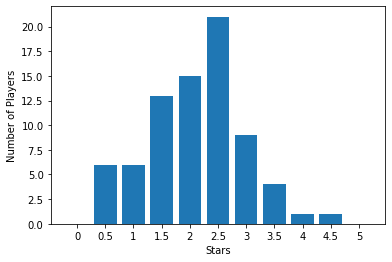

In [4]:
display_name(worst_lineup(pies), pre="Worst Batter:")
print(grab_and_smash(pies))

## Out of Sight
**Send your 2 Worst Pitchers to the Shadows and call up your First 2 Relievers.**

See below for analysis.

In [5]:
display_stars(pies.bullpen[0:2])
print("Replaces:")
display_stars(worst_rotation(pies, 2))

Name,Batting Stars,Pitching Stars,Baserunning Stars,Defense Stars
Castillo Logan,2,3,2.5,3
Bambi Perez,1.5,0.5,2.5,3


Replaces:


Name,Batting Stars,Pitching Stars,Baserunning Stars,Defense Stars
Bright Zimmerman,3,1.5,0.5,3
Henry Marshallow,1.5,1.5,1,3.5


## Disappearing Acts
**Send your Worst 3 Hitters to the Shadows and call up the first 3 Shadows Hitters.**

See below for anaylsis.

In [6]:
display_stars(pies.bench[0:3])
print("Replaces:")
display_stars(worst_lineup(pies, 3))

Name,Batting Stars,Pitching Stars,Baserunning Stars,Defense Stars
Adrian Melon,2.5,1,3,2.5
August Obrien,3.5,1,3.5,2
Mcfarland Vargas,1.5,1.5,4,2


Replaces:


Name,Batting Stars,Pitching Stars,Baserunning Stars,Defense Stars
Farrell Seagull,1.5,2,2.5,1
Yusef Puddles,2,2,2.5,3.5
Lang Richardson,2.5,0.5,3,3


## Feel the Love
**Give your Team Love Blood Type.**

Currently Love Blood does not have an in-game impact. It will probably gain a gameplay mechanic once the blessing is
passed, but this is currently unknown.

## Hot Sauce Bar
**Help yourselves. A player on each team in your Division gets Spicy.**

Spicy gives a player improved batting if they get 3 hits in a row, which lasts until they get out at-bat again
(strikeout, fly or ground out). Pies batting is strong but not generally known for consistency.

## Fifth Base Bubble
**Give all of the teams not in your Division the Fifth Base.**

Exact impact unknown. A Fifth base is generally bad for teams that have weak baserunning and hitting.

## The Shame Bubble
**Give all of the teams not in your Division Targeted Shame.**

We had this in Season 8, not sure how much of an impact it made for us specifically.

## Tag Team Pitching
**Improve your team's pitching by 10%. The last place team in the opposite subleague also gets +10% team pitching.**

See below for analysis.

In [7]:
tacos = Team.load_by_name("Tacos")
pies_changed, tacos_changed = tag_team_pitching(pies, tacos)

print("Pies Improvement:")
print("Total:", star_compare(total_stars(pies_changed), total_stars(pies.rotation)))
print("Average:", star_compare(avg_stars(pies_changed), avg_stars(pies.rotation)))

print("Tacos Improvement:")
print("Total:", star_compare(total_stars(tacos_changed), total_stars(tacos.rotation)))
print("Average:", star_compare(avg_stars(tacos_changed), avg_stars(tacos.rotation)))

Pies Improvement:
Total: {'batting': 0.0, 'baserunning': 0.0, 'defense': 0.0, 'pitching': 4.0}
Average: {'batting': 0.0, 'baserunning': 0.0, 'defense': 0.0, 'pitching': 0.8000000000000003}
Tacos Improvement:
Total: {'batting': 0.0, 'baserunning': 0.0, 'defense': 0.0, 'pitching': 1.0}
Average: {'batting': 0.0, 'baserunning': 0.0, 'defense': 0.0, 'pitching': 0.5}


## Tag Team Hitting
**Improve your team's hitting by 10%. The last place team in the opposite subleague also gets +10% team hitting.**

See below for analysis.

In [8]:
pies_changed, tacos_changed = tag_team_hitting(pies, tacos)

print("Pies Improvement:")
print("Total:", star_compare(total_stars(pies_changed), total_stars(pies.lineup)))
print("Average:", star_compare(avg_stars(pies_changed), avg_stars(pies.lineup)))

print("Tacos Improvement:")
print("Total:", star_compare(total_stars(tacos_changed), total_stars(tacos.lineup)))
print("Average:", star_compare(avg_stars(tacos_changed), avg_stars(tacos.lineup)))

Pies Improvement:
Total: {'batting': 4.0, 'baserunning': 0.0, 'defense': 0.0, 'pitching': 0.0}
Average: {'batting': 0.5714285714285716, 'baserunning': 0.0, 'defense': 0.0, 'pitching': 0.0}
Tacos Improvement:
Total: {'batting': 3.5, 'baserunning': 0.0, 'defense': 0.0, 'pitching': 0.0}
Average: {'batting': 0.5, 'baserunning': 0.0, 'defense': 0.0, 'pitching': 0.0}


## Kill Your Darling
**Incinerate the Most Idolized Player on your Team.**

Hey.

Don’t.

## Dead Weight
**Incinerate the Worst Player on Your Team.**

See below for analysis.

In [9]:
#TODO

## New Kid
**Incinerate the Least Idolized Player on your Team.**

Cannot currently know who the least-idolized player on the team is. With correct organization could be used as a
controlled incineration for one of our bad players.

## Boatload of Tiny Eggs
**Fans of your team receive a big barrel of peanuts.**

Peanuts would be used for the Hall of Flame ratings. Amount of peanuts in a “boatload” is unknown; last season’s
blessing was 10K.

## New Recruit
**Recruit a rookie to be an extra player in your lineup.**

This would cause the existing players to bat less, which means we would need to get a reroll of over our team average
to not lose total team stars. See below for analysis.

In [10]:
# TODO: Get FANCY with toggles
interact(new_recruit, team=pies, batting_stars=widgets.FloatSlider(max=5.0, value=NEW_PLAYER["batting"]),
                     baserunning_stars=widgets.FloatSlider(max=5.0, value=NEW_PLAYER["baserunning"]),
                     defense_stars=widgets.FloatSlider(max=5.0, value=NEW_PLAYER["defense"]))

print("Team Lineup Average Stars:", avg_stars(pies.lineup))

ValueError: cannot find widget or abbreviation for argument: 'bat_star'